In [21]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import os


In [22]:
current_path = os.getcwd()
current_path = os.getcwd()
genre_music_path = os.path.join(current_path, 'genres_original')
class_xls_path = os.path.join(current_path, 'class_xls')
print(list(os.listdir(genre_music_path)))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [23]:
# Importing 1 file
audio_file = os.path.join(genre_music_path,'reggae','reggae.00036.wav')
y, sr = librosa.load(audio_file)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [24]:
audio_file, _ = librosa.effects.trim(y)

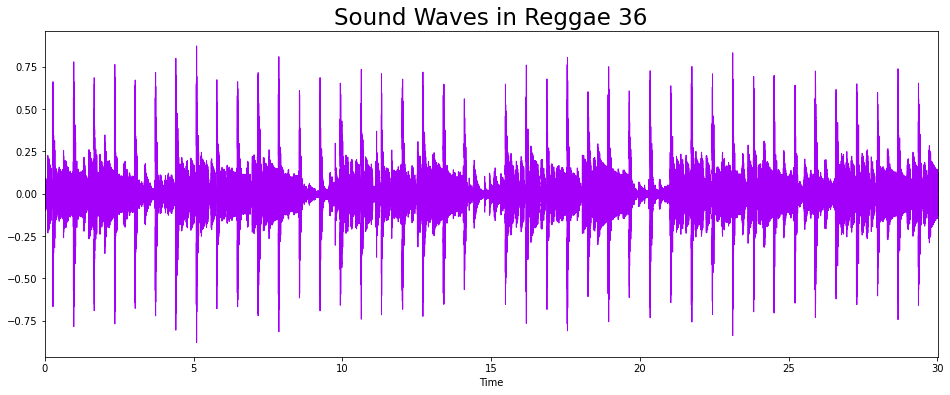

In [25]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

Fourier Transform
Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [26]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


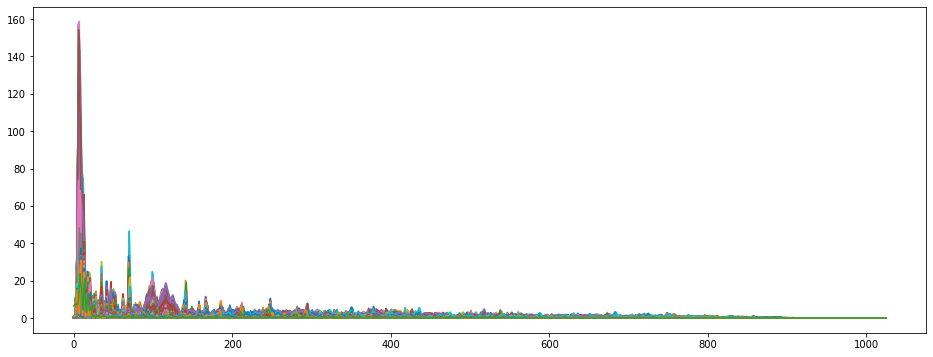

In [27]:
plt.figure(figsize = (16, 6))
plt.plot(D);

In [28]:
def FileCheck(fn):
    try:
      librosa.load(fn, mono=True, duration=30)
      return 1
    except:
      print ("Error: File does not appear to exist.")
      return 0

In [28]:
def FileCheck(fn):
    try:
      librosa.load(fn, mono=True, duration=30)
      return 1
    except:
      print ("Error: File does not appear to exist.")
      return 0

In [38]:
def GetGenre(genre_music_path):
    label_names = [item for item in os.listdir(
        genre_music_path) if os.path.isdir(os.path.join(genre_music_path, item))]
    nb_train_samples = sum([len(files) for _, _, files in os.walk(genre_music_path)])
    
    return label_names, nb_train_samples

In [45]:
# Sampling rate.
sr = 22050

# Let's make sure all files have the same amount of samples and pick a duration right under 30 seconds.
TOTAL_SAMPLES = 29 * sr

# The dataset contains 999 files. Lets make it bigger. 
# X amount of slices => X times more training examples.
NUM_SLICES = 10
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)

In [54]:
def GetFeature_enhance(g, filename, y, sr, start_sample, end_sample, s):
    # print(songname, g, filename, s)
    
    chroma_stft = librosa.feature.chroma_stft(y=y[start_sample:end_sample], sr=sr)
    rmse = librosa.feature.rms(y=y[start_sample:end_sample])
    spec_cent = librosa.feature.spectral_centroid(y=y[start_sample:end_sample], sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y[start_sample:end_sample], sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y[start_sample:end_sample], sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=y[start_sample:end_sample])
    mfcc = librosa.feature.mfcc(y=y[start_sample:end_sample], sr=sr)
    filename = filename + '_' + str(s)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    return to_append

In [47]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [55]:
file = open(os.path.join(class_xls_path,'data1.csv'), 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres, nb_train_samples = GetGenre(genre_music_path)
for g in genres:
    for filename in os.listdir('{0}/{1}'.format(genre_music_path, g)):
        songname = '{0}/{1}/{2}'.format(genre_music_path, g,filename)
        if FileCheck(songname)!=1:
            continue
        y, sr = librosa.load(songname, mono=True, duration=29)
        for s in range(NUM_SLICES):
            start_sample = SAMPLES_PER_SLICE * s
            end_sample = start_sample + SAMPLES_PER_SLICE
            to_append = GetFeature_enhance(g,filename, y, sr, start_sample, end_sample, s)
            file = open(os.path.join(class_xls_path,'data1.csv'), 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())

Error: File does not appear to exist.
